Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2415
           1       0.82      0.36      0.50        85

    accuracy                           0.98      2500
   macro avg       0.90      0.68      0.75      2500
weighted avg       0.97      0.98      0.97      2500



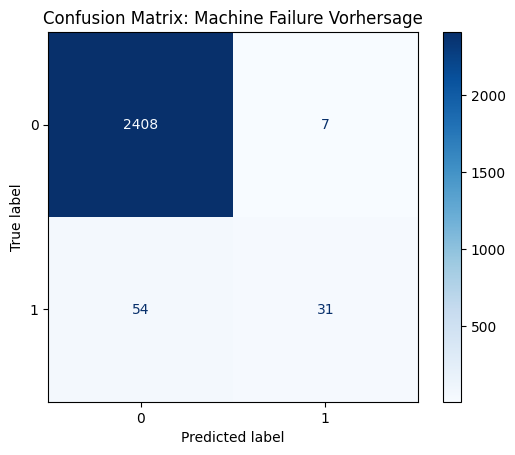

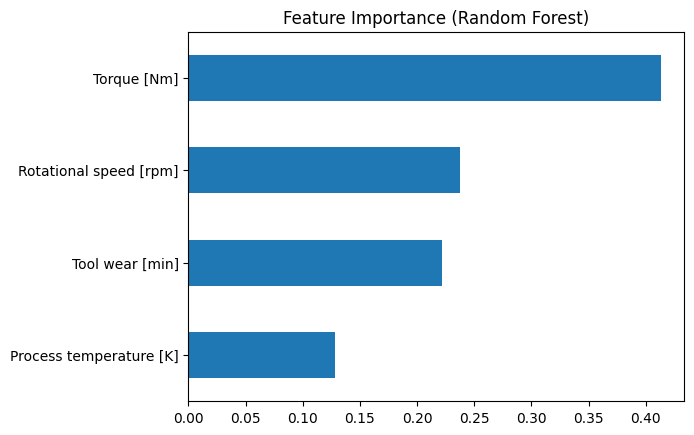

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Daten laden
df = pd.read_csv('../data/ai4i2020.csv')

# Zielvariable
y = df['Machine failure']

# Feature-Auswahl (du kannst anpassen!)
features = ['Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]', 'Process temperature [K]']
X = df[features]

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Modell trainieren
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Vorhersage & Bewertung
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Machine Failure Vorhersage")
plt.show()

# Feature Importance
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance (Random Forest)")
plt.show()
